In [8]:
import numpy as np
import math as mt
import sympy as sym
import matplotlib.pyplot as plt

In [10]:
def convection_equation_solver(phi_fun, psi_fun, L, N, h, tau):
    
    x_grid_0 = np.linspace(0, 1, L + 1)
    t_grid_0 = np.linspace(0, 1, N + 1)

    a_n = - (2 * t_grid_0 + 3)
    a_dt = - 2

    phi = sym.lambdify(x, phi_fun, modules="numpy")
    u_0 = phi(x_grid_0)

    psi = sym.lambdify(t, psi_fun, modules="numpy")
    psi_dt = sym.lambdify(t, sym.diff(psi_fun, t, 1), modules="numpy")
    psi_2dt = sym.lambdify(t, sym.diff(psi_fun, t, 2), modules="numpy")
    psi_3dt = sym.lambdify(t, sym.diff(psi_fun, t, 3), modules="numpy")

    psi_set = psi(t_grid_0)
    psi_dt_set = psi_dt(t_grid_0)
    psi_2dt_set = psi_2dt(t_grid_0)
    psi_3dt_set = psi_3dt(t_grid_0)

    u_dx = - psi_dt_set / a_n
    u_2dx = (psi_2dt_set + a_dt * u_dx) / (a_n ** 2)
    u_3dx = - psi_3dt_set / (a_n ** 3) + 3 * a_dt * u_2dx / (a_n ** 2)

    u_L = psi_set
    u_L_1 = u_L - h * u_dx + h**2 * u_2dx / 2 - h**3 * u_3dx / 6
    u_L_2 = u_L - 2 * h * u_dx + 2 * h**2 * u_2dx - 4 * h**3 * u_3dx / 3

    u_next = u_0.copy()
    for n in range(1, N + 1):
        u_open = u_next.copy()

        u_next = np.zeros(L + 1)
        u_next[L] = u_L[n]
        u_next[L - 1] = u_L_1[n]
        u_next[L - 2] = u_L_2[n]

        for l in range(L - 2):
            u_l_3 = u_open[l + 3]
            u_l_2 = u_open[l + 2]
            u_l_1 = u_open[l + 1]
            u_l = u_open[l]
            first_sum = (2 * n * tau + 3 + tau) * (2 * u_l_3 - 9 * u_l_2 + 18 * u_l_1 - 11 * u_l) * tau / (6 * h)
            second_sum = (2 * n * tau + 3) * (2 * n * tau + 3 + 2 * tau) * (- u_l_3 + 4 * u_l_2 - 5 * u_l_1 + 2 * u_l) * tau**2 / (2 * h**2)
            third_sum = (2 * n * tau + 3)**3 * (u_l_3 - 3 * u_l_2 + 3 * u_l_1 - u_l) * tau**3 / (6 * h**3)
            u_next[l] = u_l + first_sum + second_sum + third_sum
    
    return u_next


AttributeError: 'Line2D' object has no property 'title'

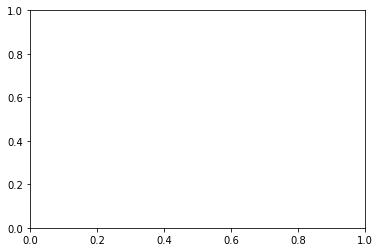

In [11]:
# Initial datas
L = 1000
N = 10 * L
tau = 1 / N
h = 1 / L

x_grid_0 = np.linspace(0, 1, L + 1)
t_grid_0 = np.linspace(0, 1, N + 1)

x, t = sym.symbols("x t")
phi_fun = sym.ln(1 + x ** 2)
psi_fun = sym.ln(1 + (1 + 3 * t + t ** 2) ** 2)

# plt.plot(t_grid_0, psi_set)
# plt.show()

u_last_t1 = convection_equation_solver(phi_fun, psi_fun, L, N, h, tau)

plt.plot(x_grid_0, u_last_t1, "-r", title="exp")
plt.plot(x_grid_0, np.ln(1 + (x_grid_0 + 4) ** 2), ".-b", title="theory")
plt.legend()
plt.show()